<a href="https://colab.research.google.com/github/CarlosCR14/IAYRN/blob/main/PIA_IARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/datos_sensores_win1252.csv', encoding='windows-1252')

In [ ]:
print(df.columns)

Index(['S1=Sensor de humedad de tierra', 'S2= Sensor de temperatura',
       'S3=Sensor de humedad del aire',
       'S4=Sensor de circulación o flujo de aire', 'clase'],
      dtype='object')


In [ ]:
X = df[['S1=Sensor de humedad de tierra', 'S2= Sensor de temperatura',
       'S3=Sensor de humedad del aire',
       'S4=Sensor de circulación o flujo de aire']]
y = df["clase"]

In [ ]:
len(y)

100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Esta seco       1.00      1.00      1.00         7
no rec. aire       1.00      1.00      1.00        11
   rec. aire       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

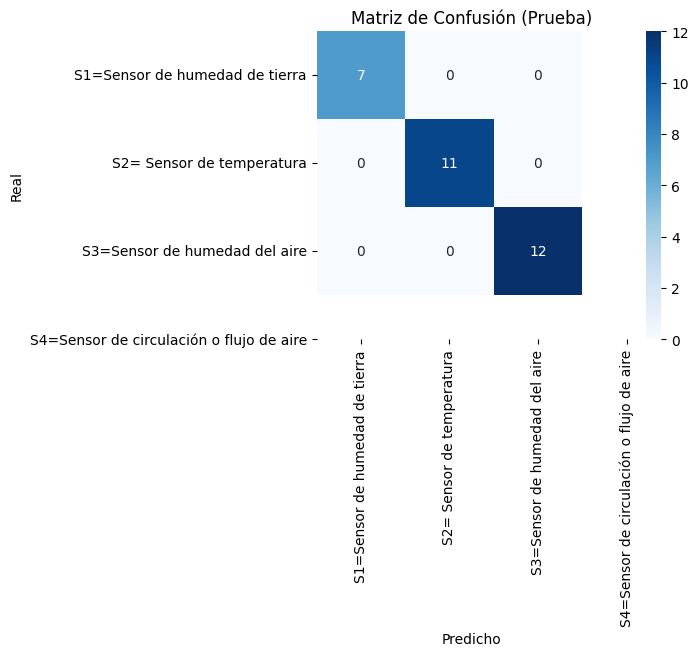

In [ ]:
# Mostrar la matriz de confusión de resultados de la prueba
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['S1=Sensor de humedad de tierra', 'S2= Sensor de temperatura',
       'S3=Sensor de humedad del aire',
       'S4=Sensor de circulación o flujo de aire'], yticklabels=['S1=Sensor de humedad de tierra', 'S2= Sensor de temperatura',
       'S3=Sensor de humedad del aire',
       'S4=Sensor de circulación o flujo de aire'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

In [ ]:
#Predicción 1
print(y_pred[1])
print(y_test.iloc[1])

no rec. aire
no rec. aire


In [ ]:
#Predicción 2
print(y_pred[20])
print(y_test.iloc[20])

no rec. aire
no rec. aire


In [ ]:
#Predicción 3
print(y_pred[-1])
print(y_test.iloc[-1])

no rec. aire
no rec. aire


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
class_names = y.unique()
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   Esta seco       1.00      1.00      1.00         7
   rec. aire       1.00      1.00      1.00        11
no rec. aire       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



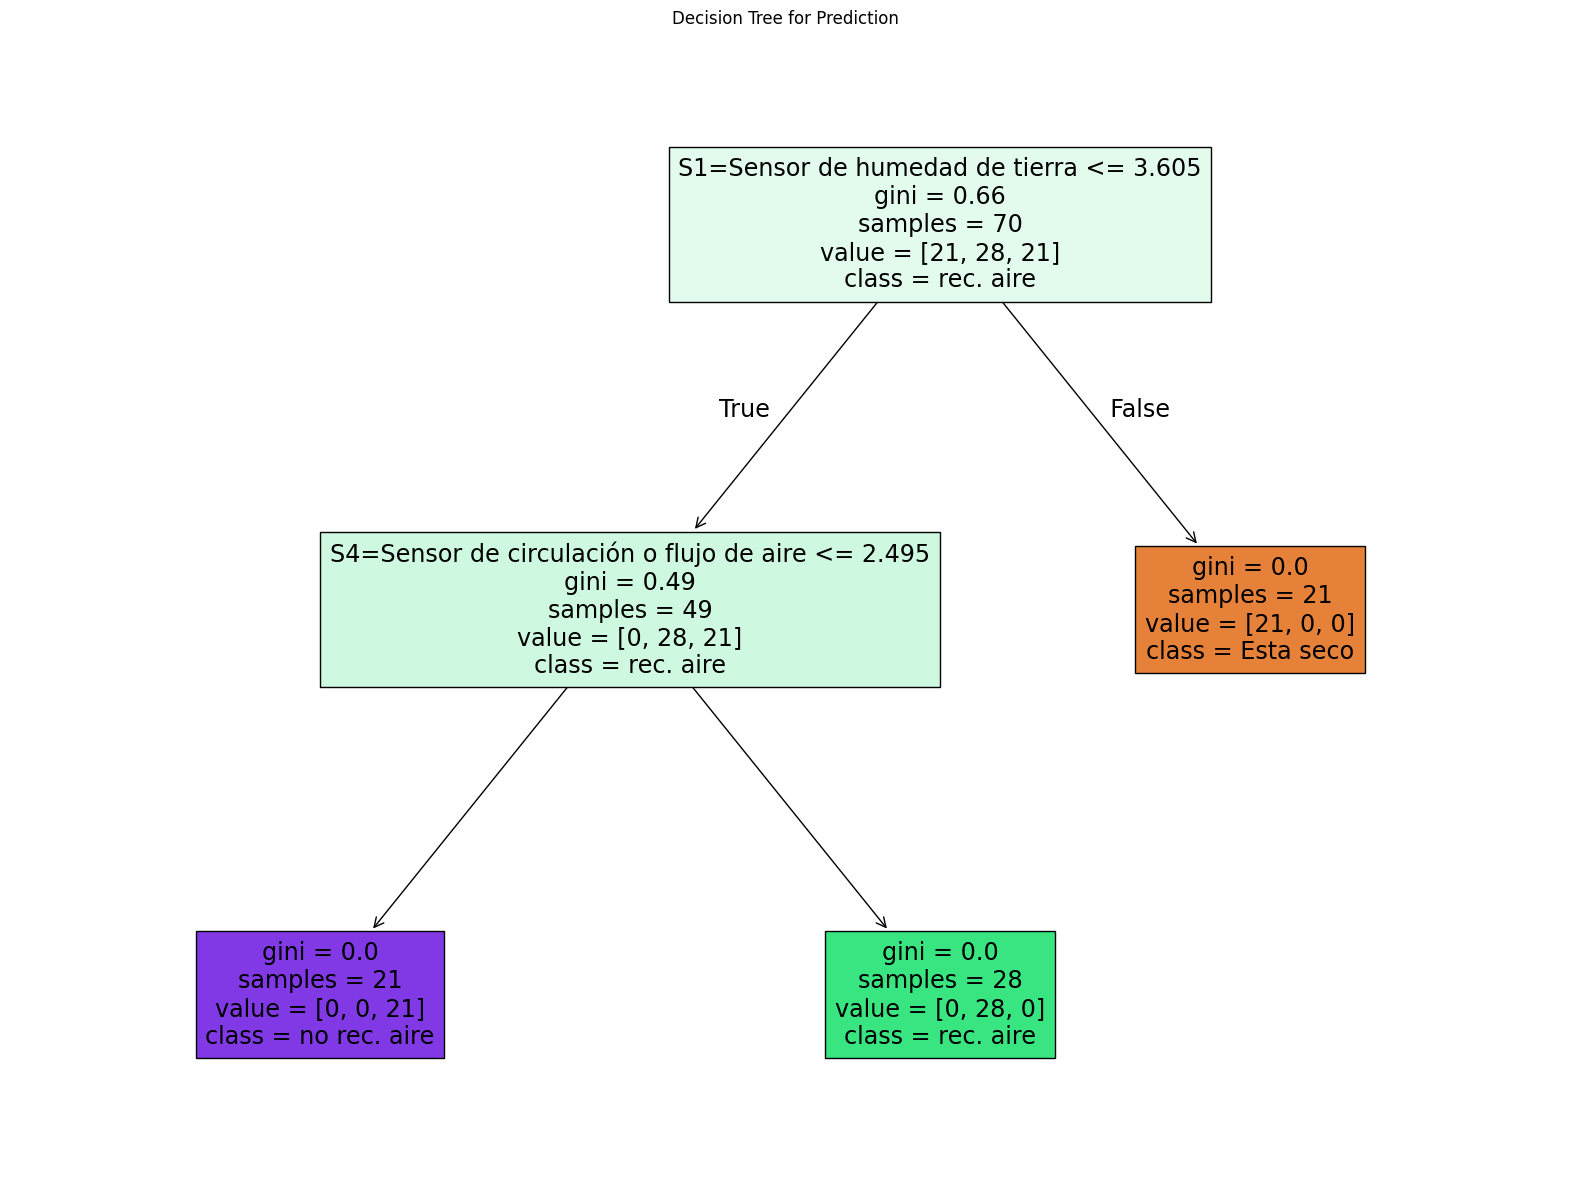

In [ ]:
plt.figure(figsize=(20, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Prediction")
plt.savefig("decision_tree.png", dpi=300)
plt.show()